In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import logging
logging.disable(logging.CRITICAL)

#%qtconsole
DATAPATH=r"""C:\Users\ojveal\Dropbox (FINNOPT)\JYU\Richard_visit\Results_for_Gecco"""


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import pickle
import pandas as pd 


import collect_data
import plot_data


# Seperate OneMax problem from the rest 
du_prob = collect_data.problems(DATAPATH)
du_prob.remove("OneMaxContinous1")

# Show generated graphs
show = True

resfile = "attainment.dmp"
problems = collect_data.problems()
df = collect_data.read_df("store.h5")
article_path=r"./article"

# Change algorithm numbers to names
df.algorithm = [collect_data.algorithms()[int(t - 1)] for t in df.algorithm]
# Set sort order
df['algorithm'] = pd.Categorical(df['algorithm'], collect_data.algorithms())
df.sort_values("algorithm", inplace = True)

df[["latency"]] = df[["latency"]].fillna(value = 1)
df[["cor"]] = df[["cor"]].fillna(value = 0)

with open(resfile, "rb") as fd:
    results = pickle.load(fd)

latencies = list(df.latency.unique())
prob = "OneMaxContinous1"
cors = [-.5, .5]
figsize = (13, 8)

<Figure size 432x288 with 0 Axes>

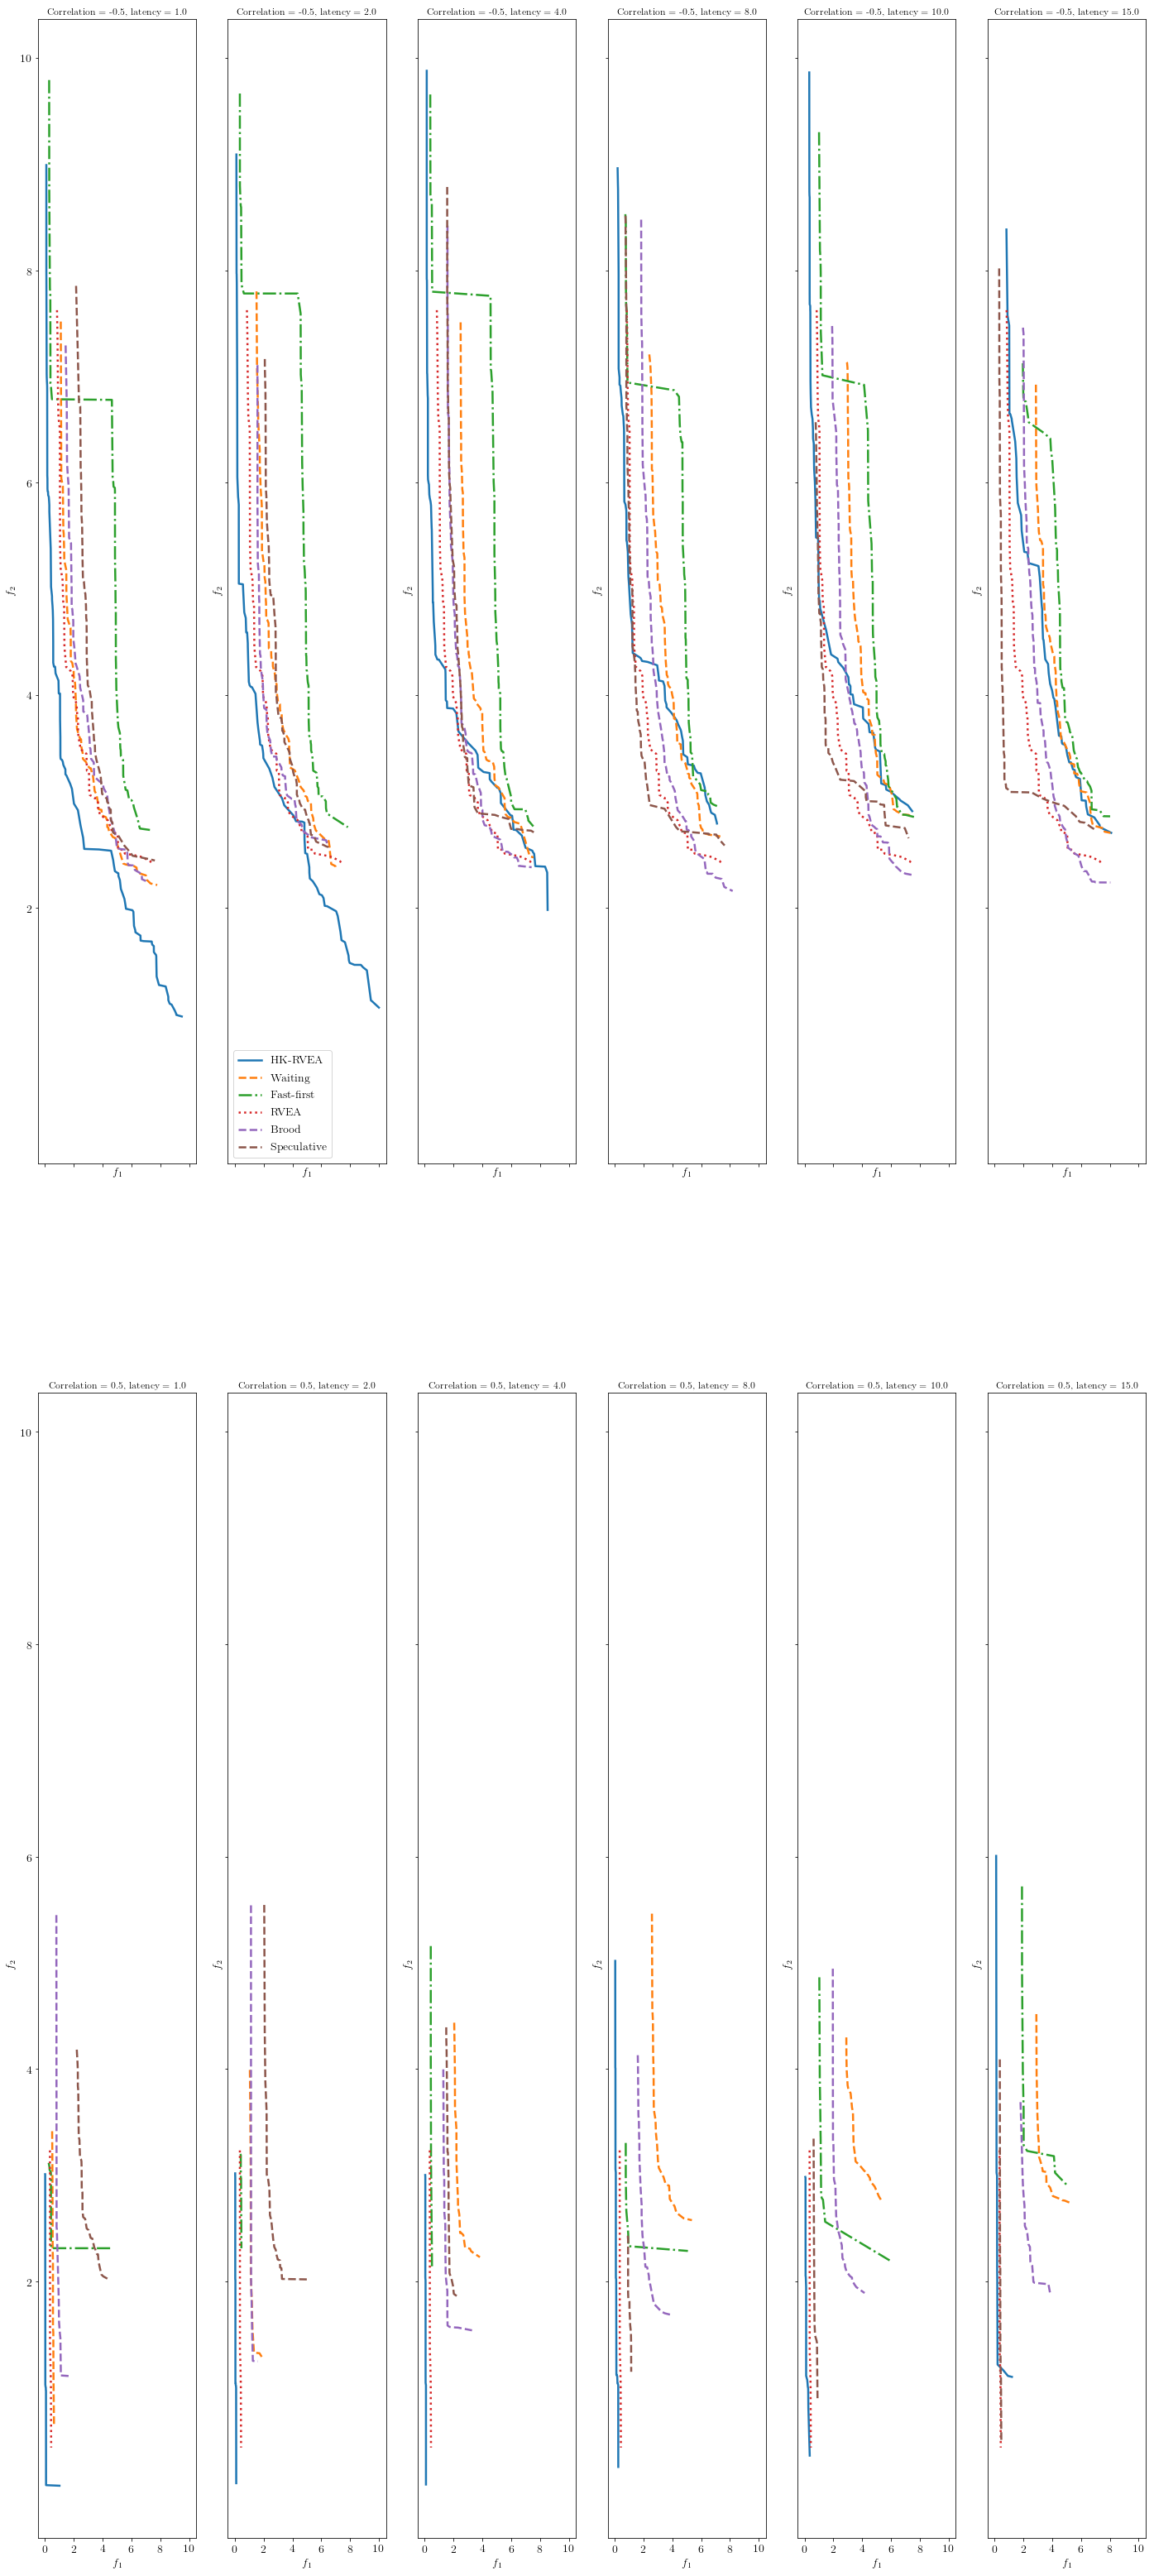

In [25]:
# Figure 1
f = plot_data.attainment_cor(results, "OneMaxContinous1", cors, latencies, figsize=figsize, force_rvea=True)


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>

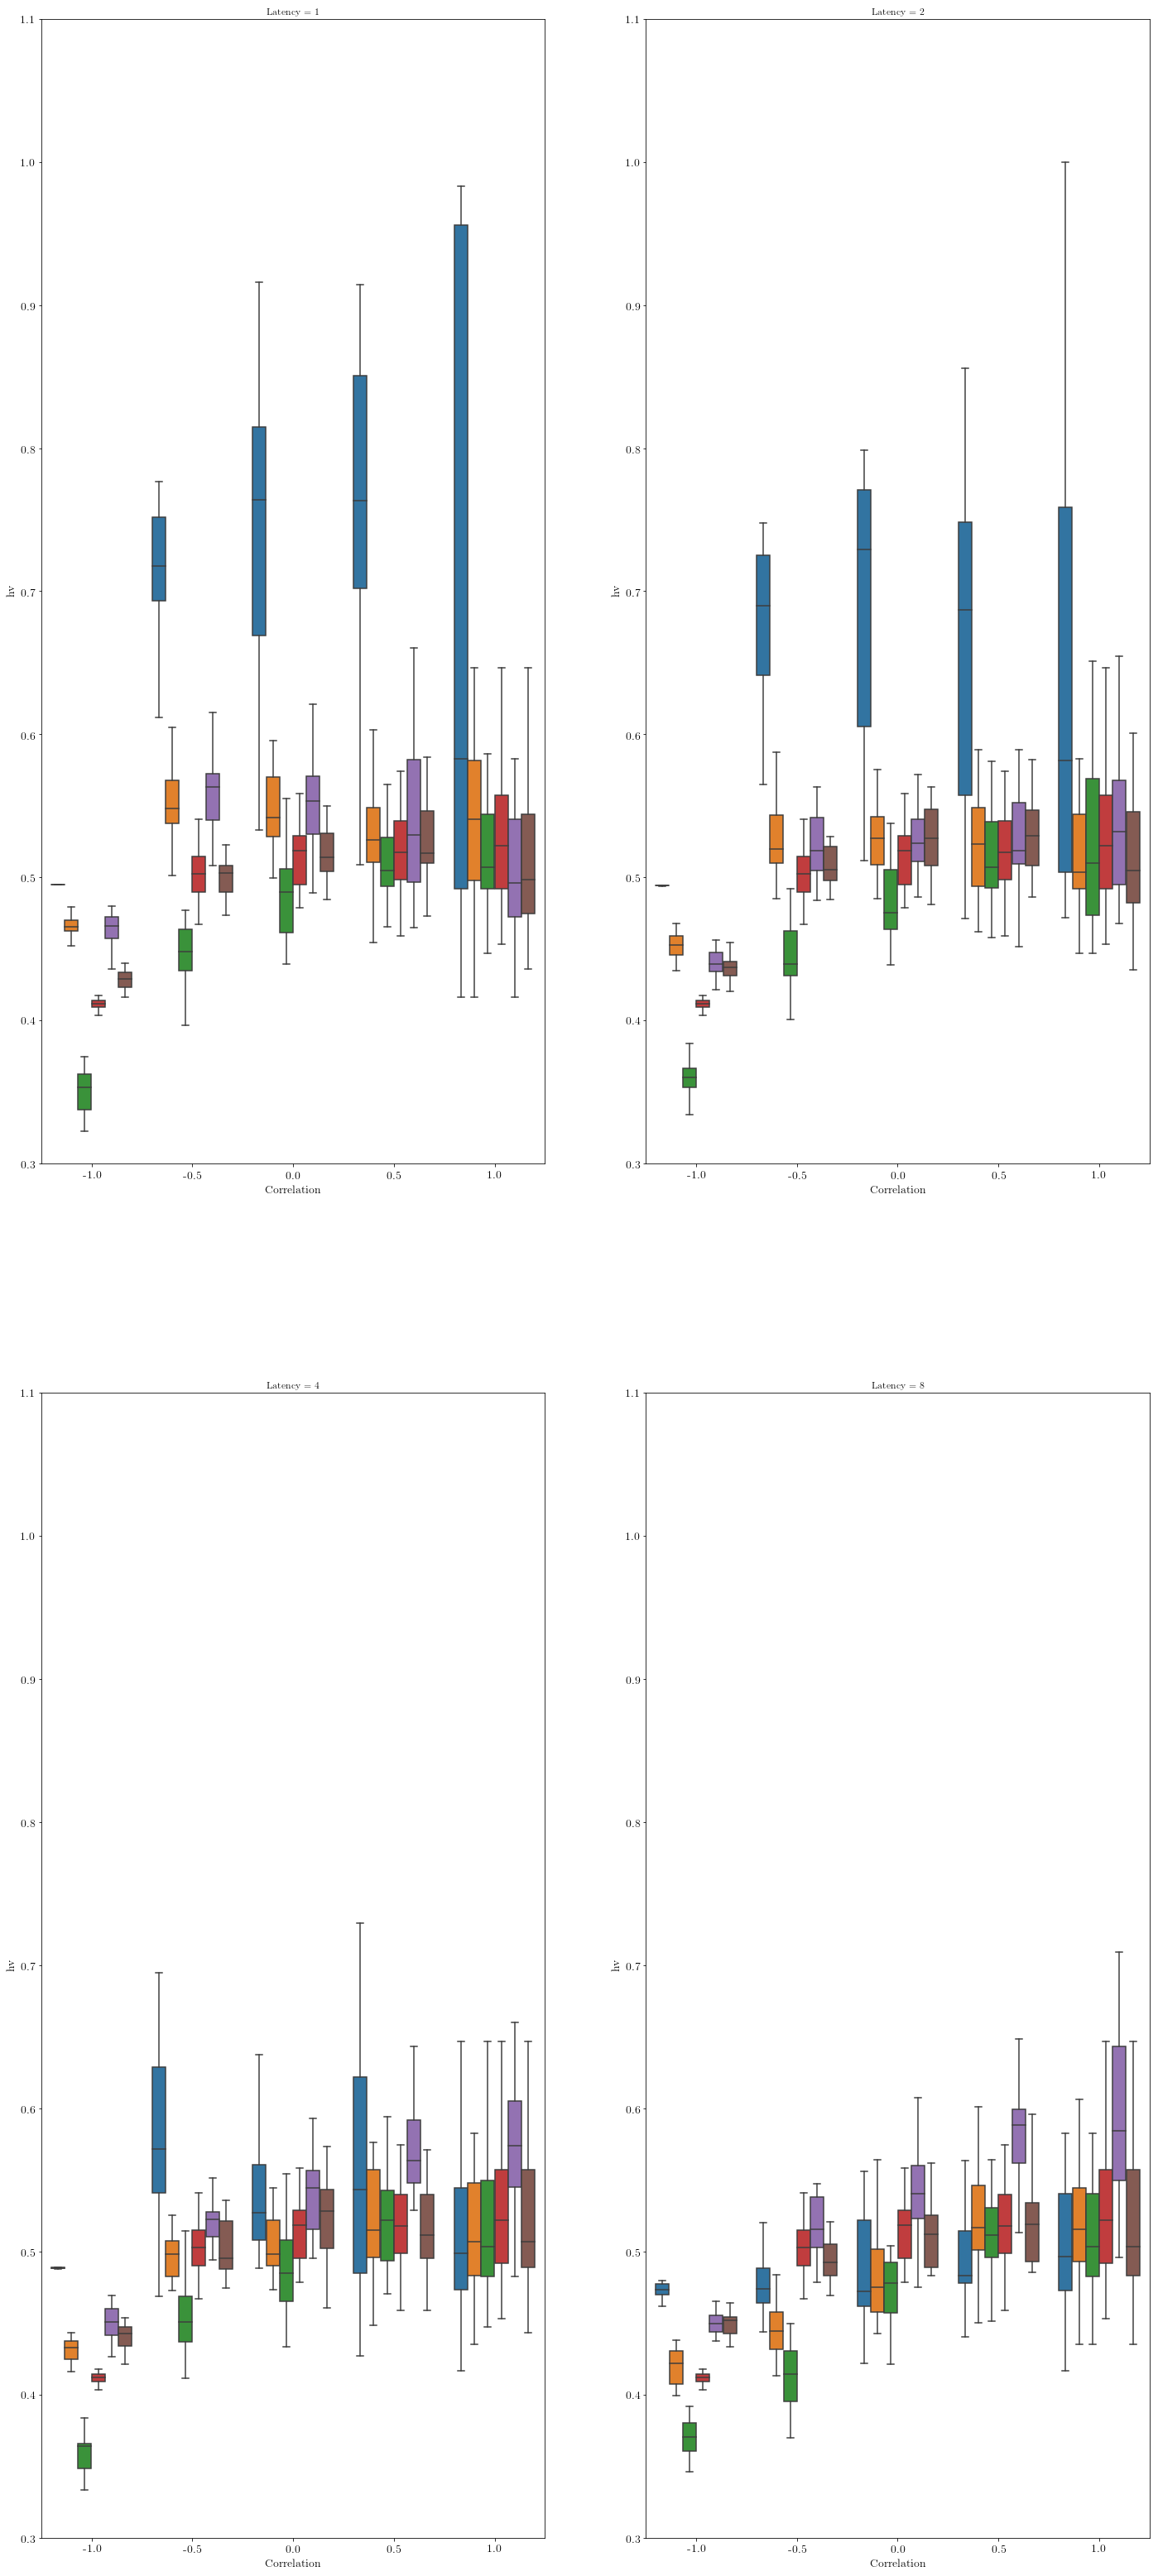

In [26]:
# Figure 2
f = plot_data.hv_cor_lat(df, "OneMaxContinous1", cors=cors, lats=latencies, figsize=figsize, force_rvea=True)

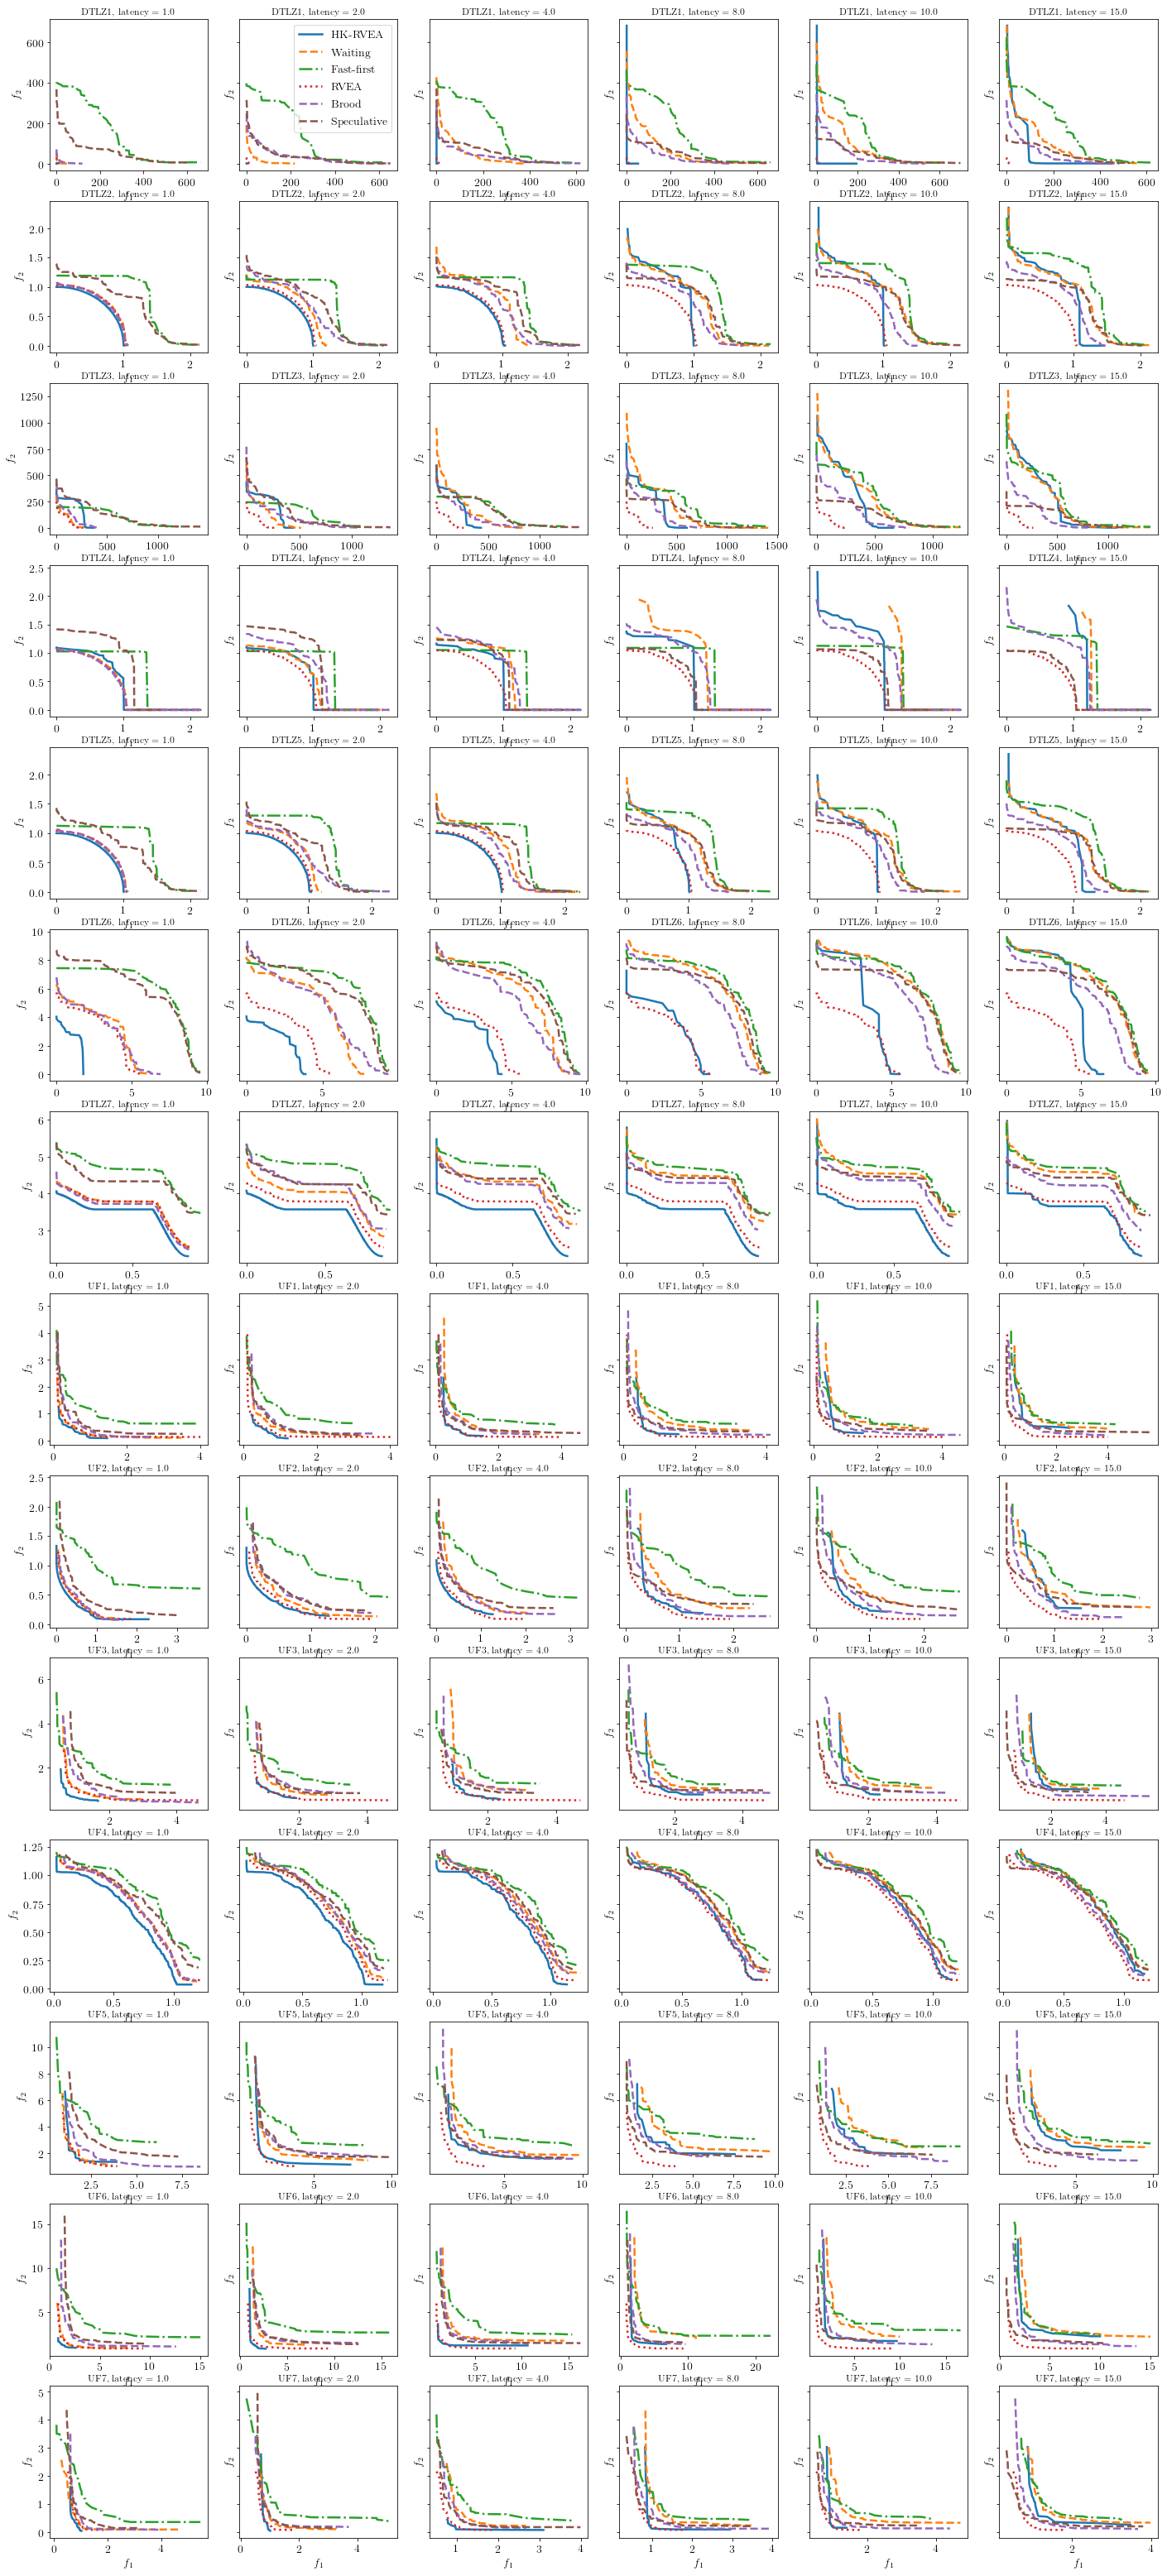

<Figure size 432x288 with 0 Axes>

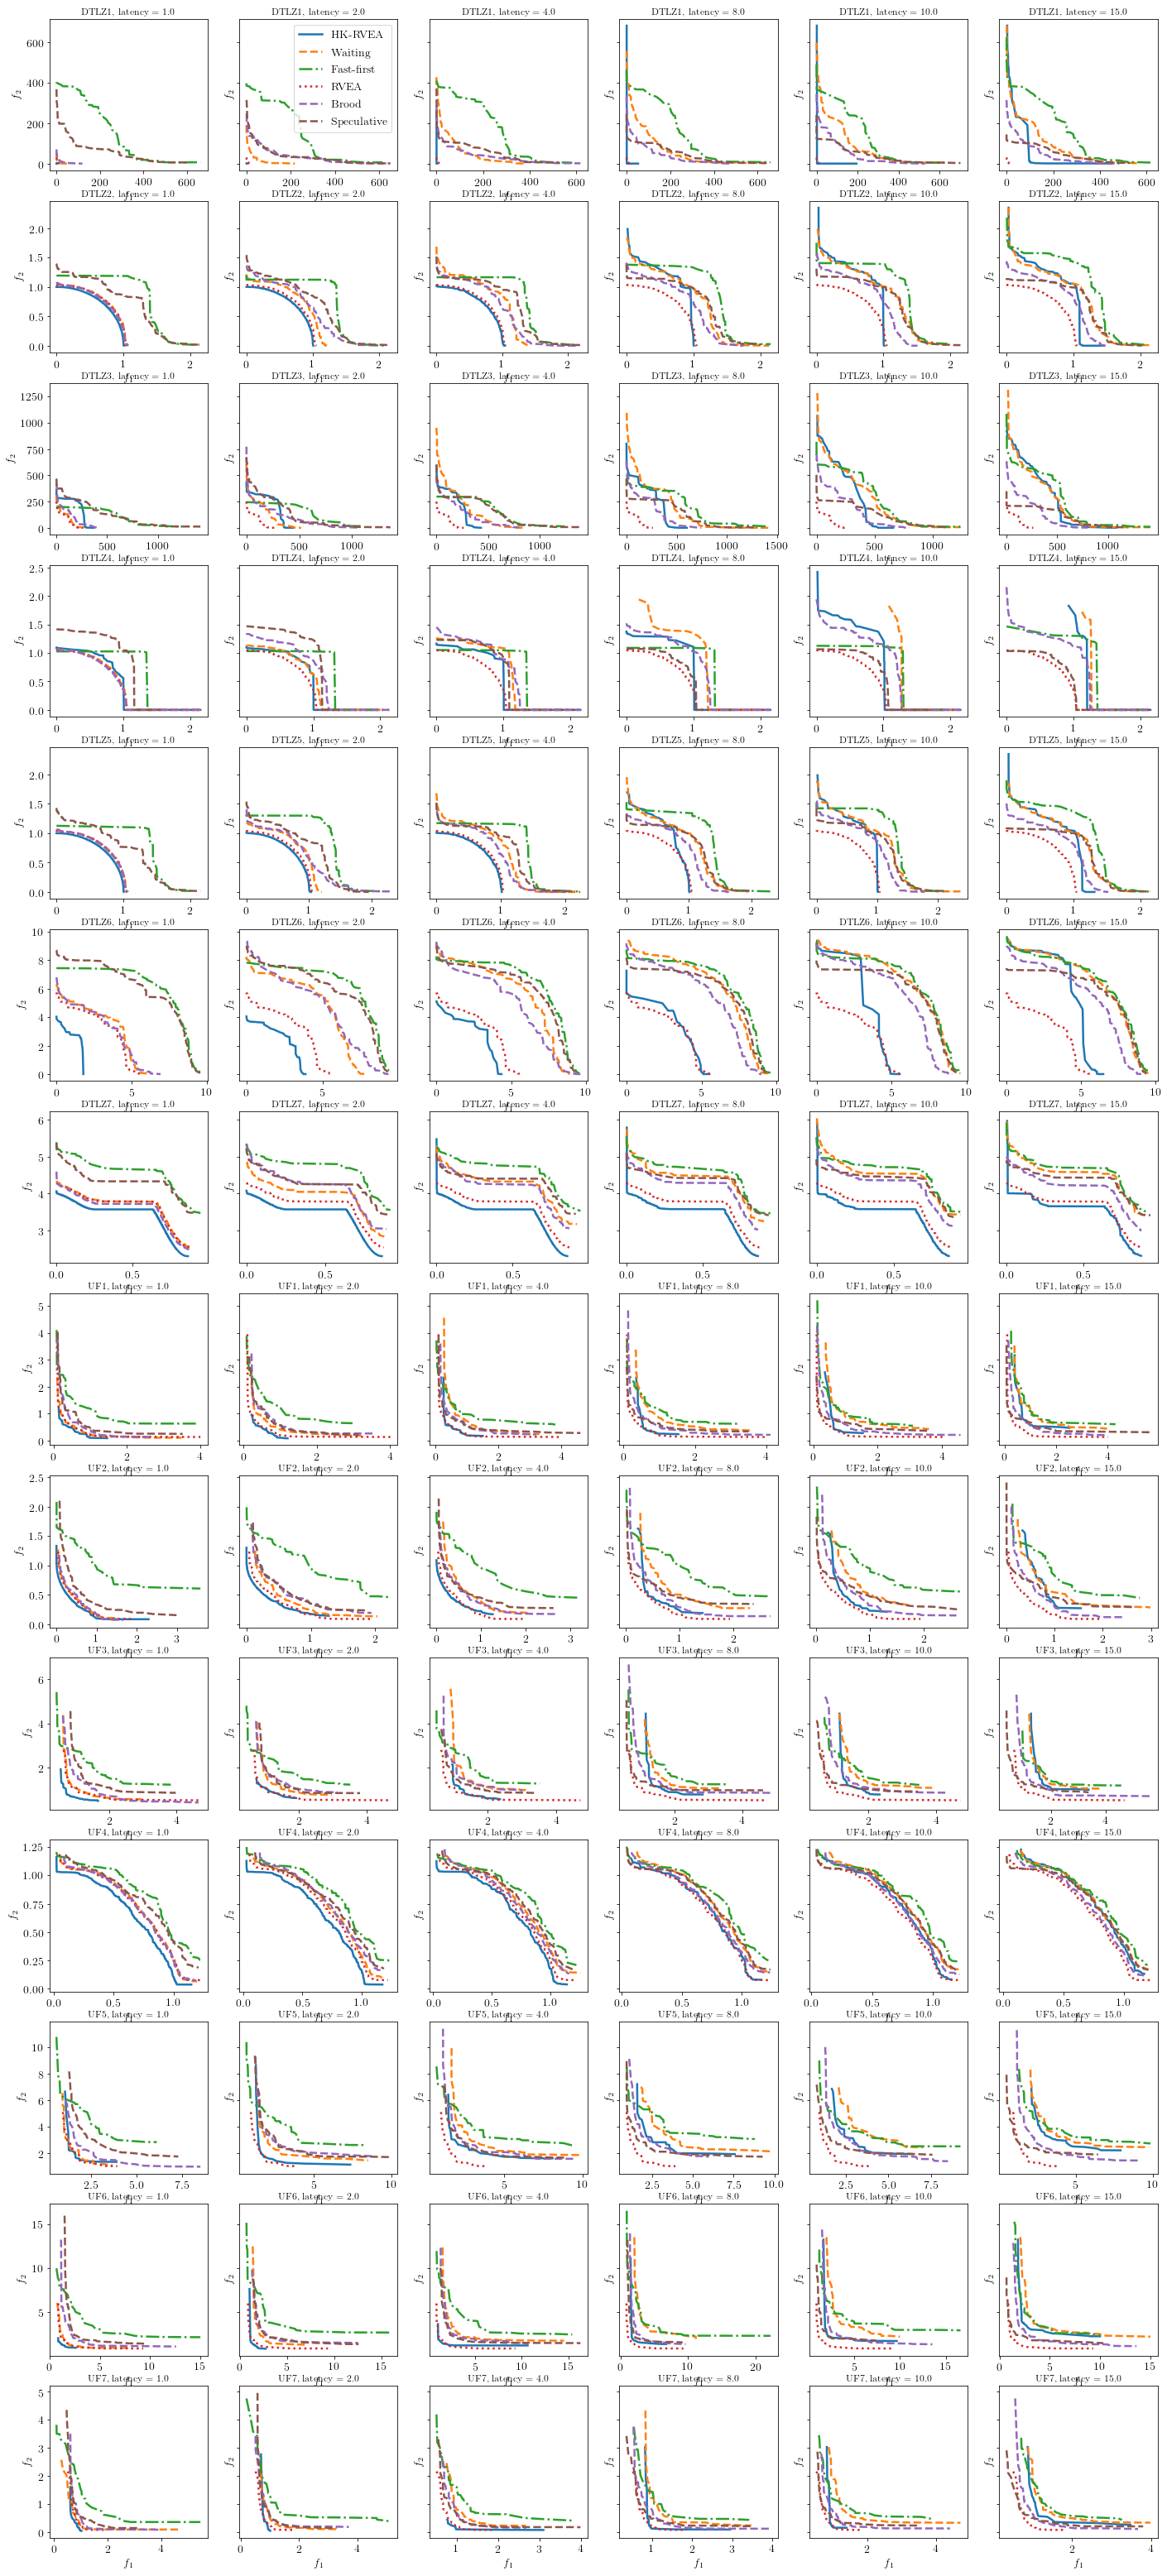

In [24]:
# Figure 3
figsize=(4*len(latencies),4*len(du_prob))
plot_data.attainment(results, du_prob, lats = latencies, figsize = figsize, force_rvea = True)

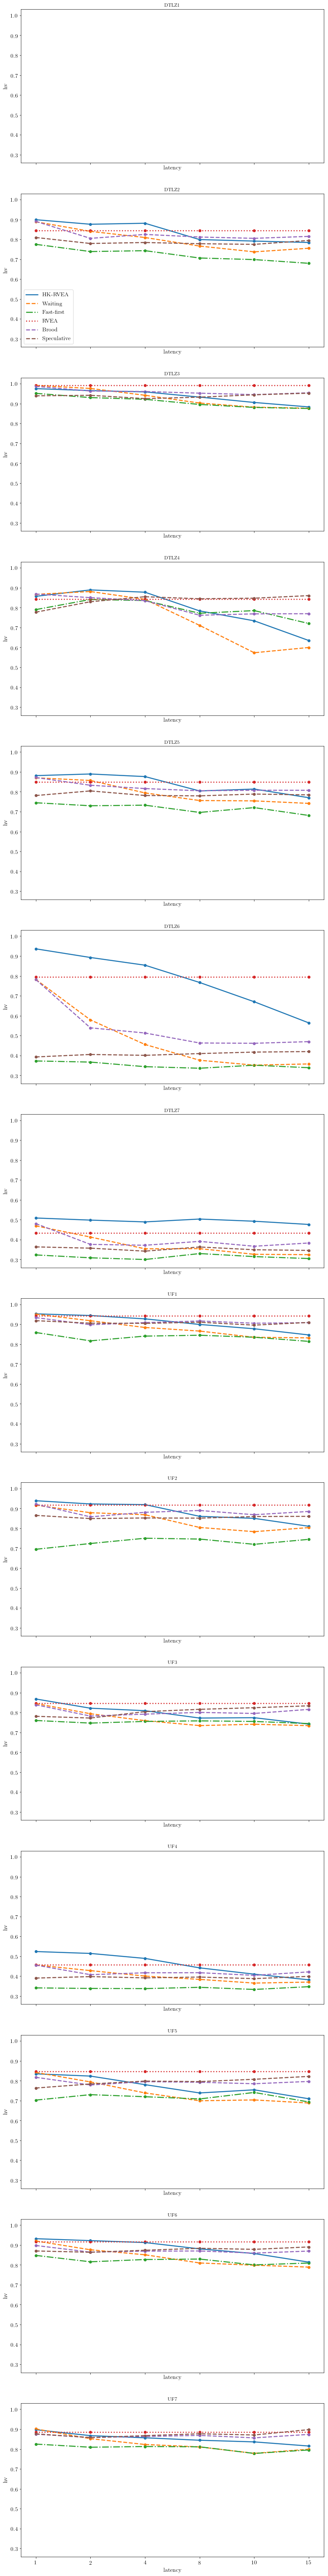

<Figure size 432x288 with 0 Axes>

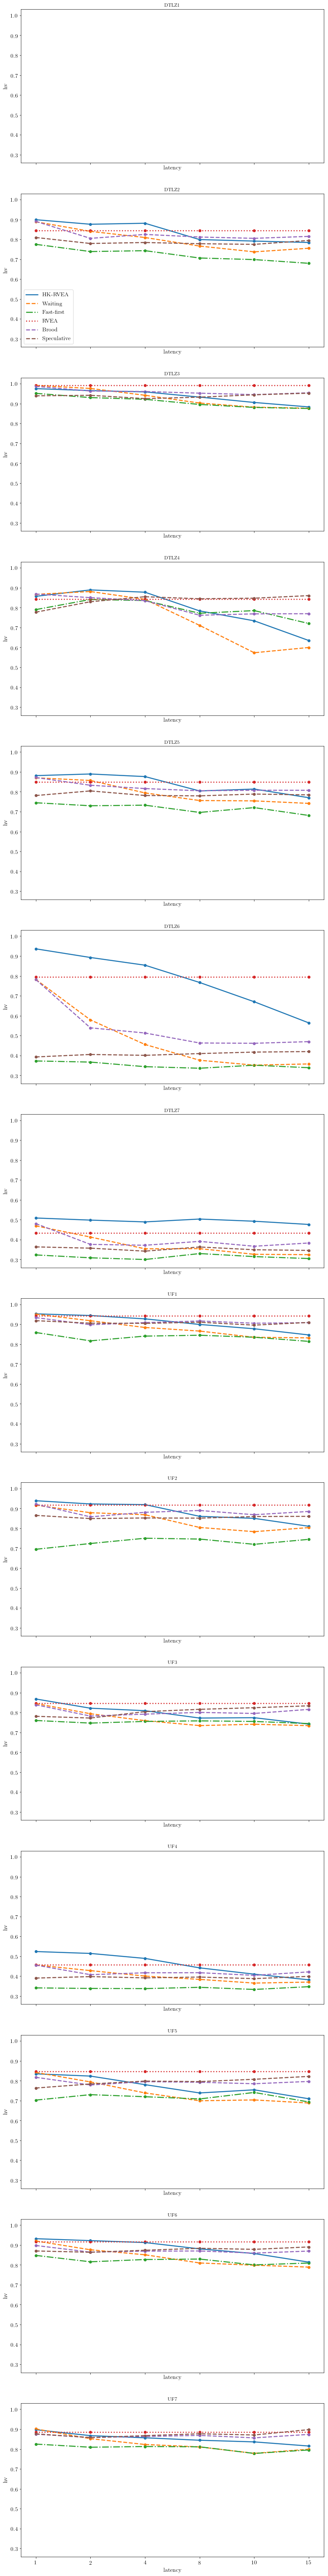

In [17]:
# Figure 4

plot_data.hv_plot(df, du_prob, lats=latencies, figsize=figsize)